# Week 1 - Data Preprocessing and Matplotlib

In this week's exercise, we will check our data and prepare it for visualisation.

## Goals

- Create a 'distance per month' function that calculates the total distance run for each month in our dataset.
- Create a Bar Chart of monthly distances using Python's matplotlib library.

## Preprocessing

### 1.  Setup:

Load libraries, in Colab these are preinstalled.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

###2. Load the Data:

In Colab, you can run the following code to download the csv automatically.

In [11]:
file_id = "1ymbNqfv9s6YGZzN93HFKAhjg0Z5xZXV1"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)

### 3. Explore the Data

Understanding the structure of the dataset is an important first step.

### 3.1 Save and inspect the data
Save the DataFrame as a CSV file using:

`df.to_csv("runningdata.csv", index=False)`

Download the file from the Colab file explorer and open it in Excel or a text editor to inspect the raw data.


In [17]:
df.to_csv("runningdata.csv", index=False)

### 3.2 Inspect Column Headers

Use Google to find a simple way to display the column headers of a pandas DataFrame.

Once you have the list of columns:
- identify the column that represents **distance**
- identify a column that can be used to derive the **month**

Explain your choices.



In [16]:
# Your code here

Index(['achievement_count', 'athlete', 'athlete_count', 'average_cadence',
       'average_heartrate', 'average_speed', 'average_temp', 'average_watts',
       'comment_count', 'commute', 'device_watts',
       'display_hide_heartrate_option', 'distance', 'elapsed_time',
       'elev_high', 'elev_low', 'end_latlng', 'external_id', 'flagged',
       'from_accepted_tag', 'gear_id', 'has_heartrate', 'has_kudoed',
       'heartrate_opt_out', 'id', 'kilojoules', 'kudos_count', 'location_city',
       'location_country', 'location_state', 'manual', 'map', 'max_heartrate',
       'max_speed', 'max_watts', 'moving_time', 'name', 'photo_count',
       'pr_count', 'private', 'resource_state', 'sport_type', 'start_date',
       'start_date_local', 'start_latlng', 'suffer_score', 'timezone',
       'total_elevation_gain', 'total_photo_count', 'trainer', 'type',
       'upload_id', 'upload_id_str', 'utc_offset', 'visibility',
       'weighted_average_watts', 'workout_type'],
      dtype='object')

### 3.3 Call and view the columns using `df['Column Name'].head()`.

Consider the format and likely units of the data.

> **Background:**  
> `.head(x)` limits output to the first 5 rows by default (or `x` rows if specified),  
> preventing performance issues with large datasets.

In [37]:
# Your code here

### 4. Process the Date Column

Create a new column containing only the year and month from the date data.

> **Hints:**
> - Assigning to `df["NewColumn"]` creates a new column if it does not already exist.
> - Use `pd.to_datetime()` to ensure the date column is correctly parsed.
> - The `dt.to_period("M")` method can be used to extract year–month values.



In [21]:
# Your code here

### 5. Aggregate

Group the data by `YearMonth` and aggregate the results to create a new DataFrame.

Your aggregated DataFrame should include:
- total distance per month
- total moving time per month
- number of runs per month

> **Hint:** After grouping, use `.reset_index()` so `YearMonth` appears as a regular column.


In [24]:
# Your code here

,YearMonth,TotalDistance,TotalMovingTime,RunCount
0,2011-01,11251.0,5785,5
1,2011-02,8810.9,3849,5
2,2011-03,5032.1,2580,2
3,2011-04,6367.8,3475,3
4,2011-07,32238.8,16692,8


### 6. Calculate Average Pace

Use the aggregated total distance and total moving time to calculate the average pace (km/min).

Store the result in a new column in the DataFrame.

> **Reminder:** Pace must be distance-weighted. Do not average per-run pace values.


In [25]:
# You code here


,YearMonth,TotalDistance,TotalMovingTime,RunCount,averagePace
0,2011-01,11251.0,5785,5,8.569609
1,2011-02,8810.9,3849,5,7.280755
2,2011-03,5032.1,2580,2,8.545140
3,2011-04,6367.8,3475,3,9.095240
4,2011-07,32238.8,16692,8,8.629353


### 7. Tidy Up

A function is a self-contained block of code that performs a task. It can take inputs and may return an output.

Functions make code more modular, reusable, and easier to understand. A useful rule of thumb is: if you repeat code, it should probably be a function.

Defining a function tells Python what it does; calling it tells Python when to run it.

To support reuse in future weeks, the model solution wraps this logic in a function.
Were your answers similar?

In [42]:
# Link to CSV file
file_id = "1ymbNqfv9s6YGZzN93HFKAhjg0Z5xZXV1"
url = f"https://drive.google.com/uc?id={file_id}"

def distance_per_month(link):
    # Read the CSV into a DataFrame
    df = pd.read_csv(link)

    # 4) Convert date column to datetime
    df["Date"] = pd.to_datetime(df["start_date"]).dt.tz_localize(None) # .dt.tz_localize is not strictly necersary but does prevent timezone information loss warnings.

    # Extract year and month
    df["YearMonth"] = df["Date"].dt.to_period("M")

    # 5) Group by month and calculate totals
    monthly_stats = (
        df.groupby("YearMonth")
          .agg(
              TotalDistance=("distance", "sum"),
              TotalMovingTime=("moving_time", "sum"),
              RunCount=("distance", "count")
          )
          .reset_index()
    )

    # 6) Calculate average pace (km per minute)
    monthly_stats["AveragePace"] = (
        (monthly_stats["TotalMovingTime"] / 60) /
        (monthly_stats["TotalDistance"] / 1000)
    )

    # Return the result
    return monthly_stats

# Call the function
monthly_stats = distance_per_month(url)

In [43]:
monthly_stats.head()

,YearMonth,TotalDistance,TotalMovingTime,RunCount,AveragePace
0,2011-01,11251.0,5785,5,8.569609
1,2011-02,8810.9,3849,5,7.280755
2,2011-03,5032.1,2580,2,8.545140
3,2011-04,6367.8,3475,3,9.095240
4,2011-07,32238.8,16692,8,8.629353


In [ ]:
#You can use this to save to google drive and download and investigate, it will appear in the default directory of the file explorer.
monthly_stats.to_csv("distance_per_month.csv", index=False)

##Visualization (Matplotlib)


### 1. Plot Distance by Month

Using matplotlib, create a bar chart that shows the total distance run in each month.

> **Hints:**
> - Use `plt.bar(x, y)` to create a bar chart.
> - Use `plt.show()` to display the chart.
> - Convert the `YearMonth` column to strings using `.astype(str)` before plotting.
> - See: https://www.w3schools.com/python/matplotlib_bars.asp


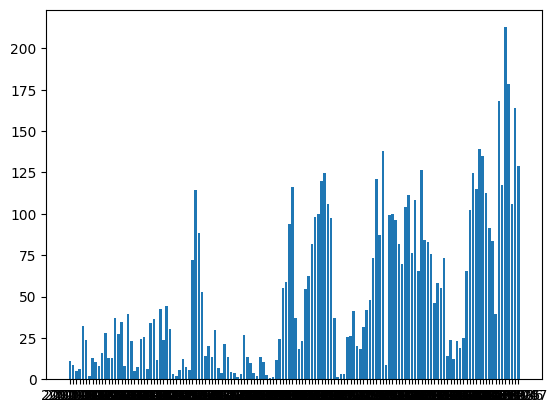

In [35]:
# Your code here

### 2. Add Titles and Labels

Add a title to the chart and labels to both axes using matplotlib.

Useful functions include:
- `plt.title()`
- `plt.xlabel()`
- `plt.ylabel()`

> **Recommendation:** Axis labels should always include units where applicable.


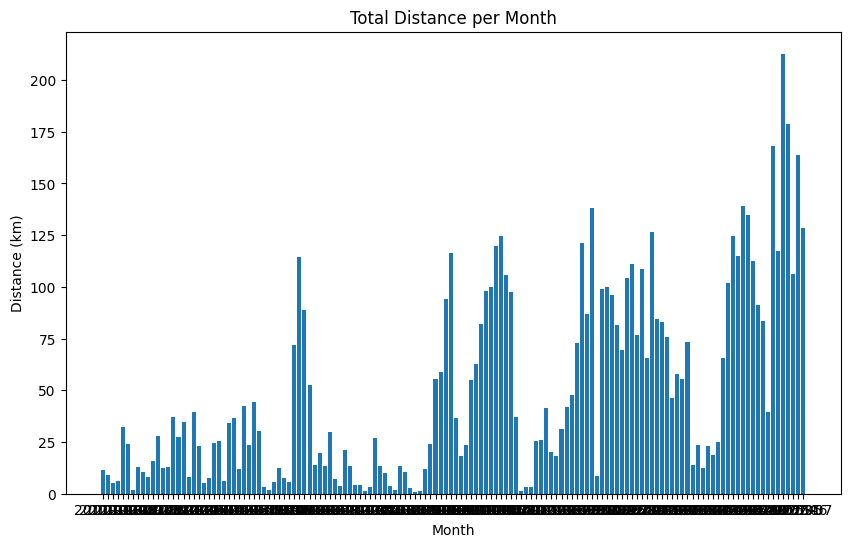

In [39]:
# Your code here


### 3. Set Tick Labels

Use `plt.xticks()` to improve the readability of the x-axis.

You may need to rotate the labels or display fewer ticks to prevent overcrowding.


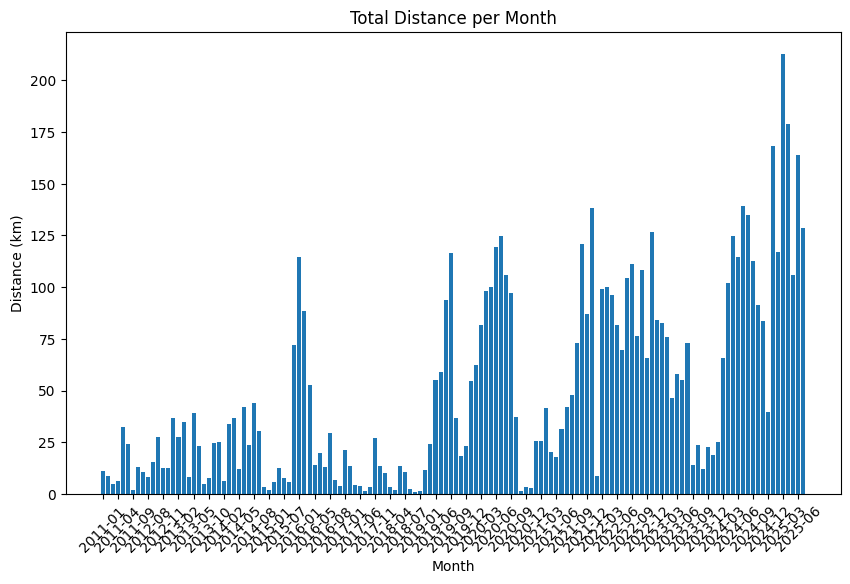

In [40]:
#Your code here

## Background Information

###Pandas

Pandas brings R-style DataFrames to Python. It relies on NumPy for low-level numerical operations and provides convenient tools for analysing tabular data.

With pandas, you can perform vectorised column operations (i.e., apply an operation to an entire column at once). While pandas is extremely powerful and easy to use, poorly written code can lead to performance issues, especially on large datasets. In many cases, slow pandas operations can be made much faster by using NumPy directly or more specialised tools.

Despite this, pandas remains an excellent choice for exploring and working with small to medium-sized datasets, and many skills you learn with pandas transfer well to higher-performance tools.

###Matplotlib
Matplotlib originated from an effort to recreate MATLAB’s plotting syntax in Python. It is extremely widely used, relatively fast, and quite powerful, especially when extended with Seaborn.

Matplotlib is arguably most suitable for static plots that can be saved as images.

Matplotlib examples gallery: https://matplotlib.org/stable/gallery/index

Seaborn examples gallery: https://seaborn.pydata.org/examples/index.html

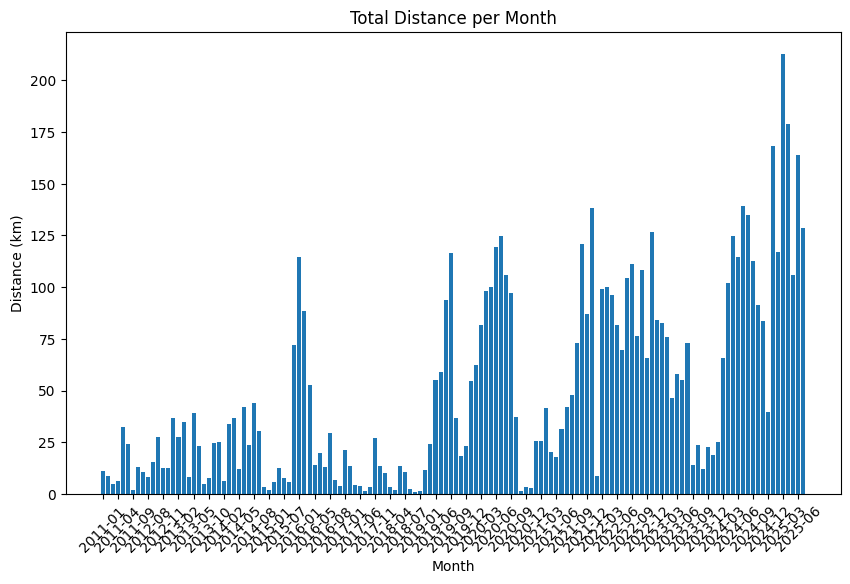

In [38]:
#Chart Solution

# Create figure size
plt.figure(figsize=(10, 6))

# Plot bar chart
plt.bar(
    monthly_stats["YearMonth"].astype(str), # We change to string to create bar chart categories.
    monthly_stats["TotalDistance"] / 1000
)
# Add labels
plt.title('Total Distance per Month')
plt.xlabel('Month')
plt.ylabel('Distance (km)')

# Rotate x-axis labels for readability, getting every third month.
plt.xticks(
    ticks=range(0, len(monthly_stats), 3), # tick positions
    labels=monthly_stats["YearMonth"].astype(str)[::3],  # labels to show
    rotation=45
)

# Display
plt.show()